- This notebook is to compare the model performance by using NN

In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [4]:
import joblib

import warnings
warnings.filterwarnings("ignore")

In [5]:
results_dict1 = joblib.load("results_dict1.pkl")
results_dict2 = joblib.load("results_dict2.pkl")
results_dict3 = joblib.load("results_dict3.pkl")

In [54]:
# No normalization on surfactant and log weighted concentration on binary
results_dict1_non_norm = joblib.load("results_dict1_no_normalization_update.pkl")
results_dict2_log = joblib.load("results_dict2_log_update.pkl")

In [6]:
results_dict1.keys()

dict_keys(['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED'])

In [13]:
results_dict1['Baseline'].keys()

Index(['run', 'RMSE', 'R2'], dtype='object')

In [14]:
results_dict2['Baseline'].keys()

Index(['run', 'roc_auc', 'mean_auc', 'std_auc'], dtype='object')

In [8]:
results_NN_surf = joblib.load("regression_results_surfactants.joblib")
results_NN_binary = joblib.load("NN_classification_results_binary_update.joblib")
results_NN_am = joblib.load("NN_classification_results_amphiphile.joblib")

In [9]:
results_NN_surf.keys()

dict_keys(['rmse_results', 'r2_results', 'y_pred_results', 'y_true_results'])

In [10]:
results_NN_binary.keys()

dict_keys(['roc_auc_results', 'y_pred_results', 'y_true_results', 'y_prob_results'])

In [15]:
results_NN_surf['rmse_results'].keys()

dict_keys(['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED'])

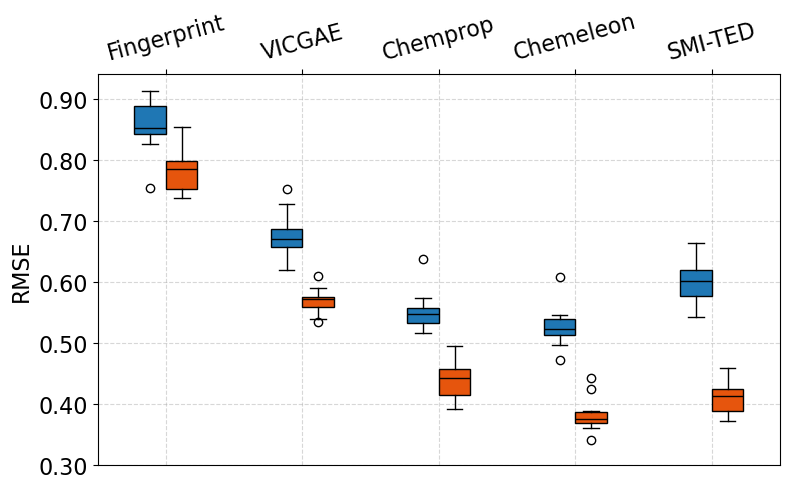

In [34]:
# Define model/dataset order and labels
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
label_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']

rf_rmse = [results_dict1[m]['RMSE'].values for m in model_type]

nn_rmse = [results_NN_surf['rmse_results'][m] for m in label_type]

x = np.arange(len(label_type))*1.3
width = 0.3  # space between boxes per group


plt.figure(figsize=(8, 5))
ax = plt.gca()

box1 = plt.boxplot(
    rf_rmse, positions=x - width/2, widths=width,
    patch_artist=True, labels=None
)
box2 = plt.boxplot(
    nn_rmse, positions=x + width/2, widths=width,
    patch_artist=True, labels=None
)

for patch in box1['boxes']:
    patch.set_facecolor('#1f77b4')  # blue for RF
for patch in box2['boxes']:
    patch.set_facecolor('#e6550d')  # darker orange for NN (better contrast)

# Make median lines black for visibility
for median in box1['medians'] + box2['medians']:
    median.set_color('black')
    median.set_linewidth(1)

# Axes formatting 
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks(ticks=x, labels=label_type, fontsize=16, rotation=15)
plt.yticks(fontsize=16)
plt.ylabel('RMSE', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0.3)

plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('')

plt.tight_layout()
plt.savefig("../results/surfactants_model_performance_update.png", dpi=600, bbox_inches="tight")
plt.show()

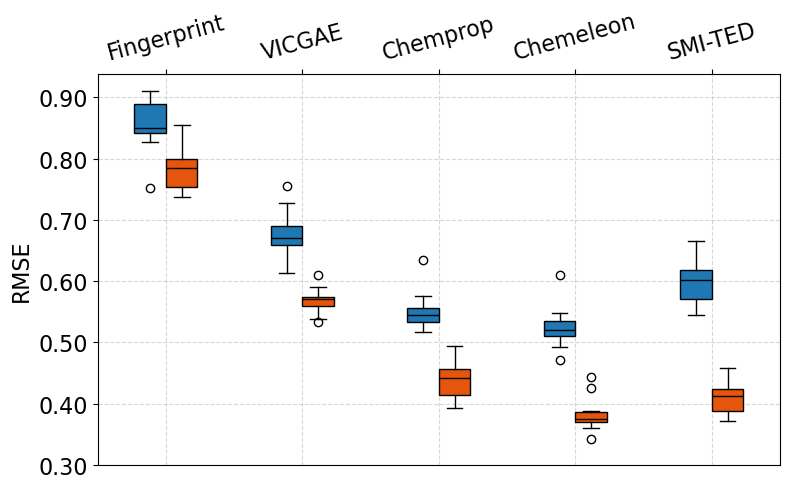

In [56]:
# Surfactants no normalization
# Define model/dataset order and labels
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
label_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']

rf_rmse = [results_dict1_non_norm[m]['RMSE'].values for m in model_type]

nn_rmse = [results_NN_surf['rmse_results'][m] for m in label_type]

x = np.arange(len(label_type))*1.3
width = 0.3  # space between boxes per group


plt.figure(figsize=(8, 5))
ax = plt.gca()

box1 = plt.boxplot(
    rf_rmse, positions=x - width/2, widths=width,
    patch_artist=True, labels=None
)
box2 = plt.boxplot(
    nn_rmse, positions=x + width/2, widths=width,
    patch_artist=True, labels=None
)

for patch in box1['boxes']:
    patch.set_facecolor('#1f77b4')  # blue for RF
for patch in box2['boxes']:
    patch.set_facecolor('#e6550d')  # darker orange for NN (better contrast)

# Make median lines black for visibility
for median in box1['medians'] + box2['medians']:
    median.set_color('black')
    median.set_linewidth(1)

# Axes formatting 
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks(ticks=x, labels=label_type, fontsize=16, rotation=15)
plt.yticks(fontsize=16)
plt.ylabel('RMSE', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0.3)

plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('')

plt.tight_layout()
plt.savefig("../../results/surfactants_model_performance_non_norm.png", dpi=600, bbox_inches="tight")
plt.show()

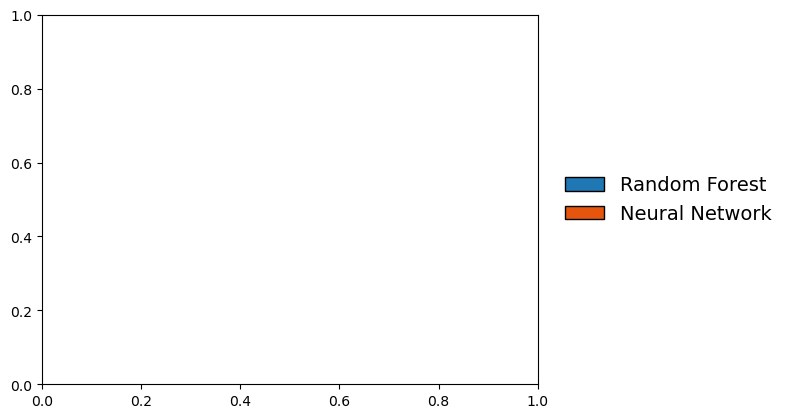

In [36]:
# --- Add legend outside the plot ---
legend_handles = [box1["boxes"][0], box2["boxes"][0]]
legend_labels = ['Random Forest', 'Neural Network']

# Place legend outside to the right
legend = plt.legend(
    legend_handles, legend_labels,
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    fontsize=14, frameon=False
)

# Save legend separately as high-resolution image (600 dpi)
# fig = plt.gcf()
# fig.savefig("RMSE_comparison_plot.png", bbox_inches='tight', dpi=600)

# Save legend alone
legend_fig = legend.figure
legend_fig.canvas.draw()
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
legend_fig.savefig("RMSE_legend.png", bbox_inches=bbox, dpi=600)


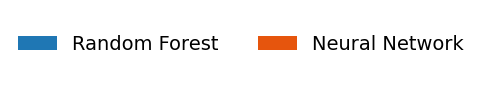

In [40]:
import matplotlib.pyplot as plt

# --- Create dummy legend handles ---
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='#1f77b4', label='Random Forest'),
    Patch(facecolor='#e6550d', label='Neural Network')
]

# --- Create the standalone legend ---
fig, ax = plt.subplots(figsize=(3, 1))  # compact horizontal legend
ax.axis('off')

legend = ax.legend(
    handles=legend_elements,
    loc='center',
    fontsize=14,
    frameon=False,
    ncol=2  # horizontal layout
)
plt.tight_layout()

# --- Save legend only ---
fig.savefig("model_performance_legend.png", bbox_inches='tight', dpi=600, transparent=True)
plt.show()
plt.close(fig)


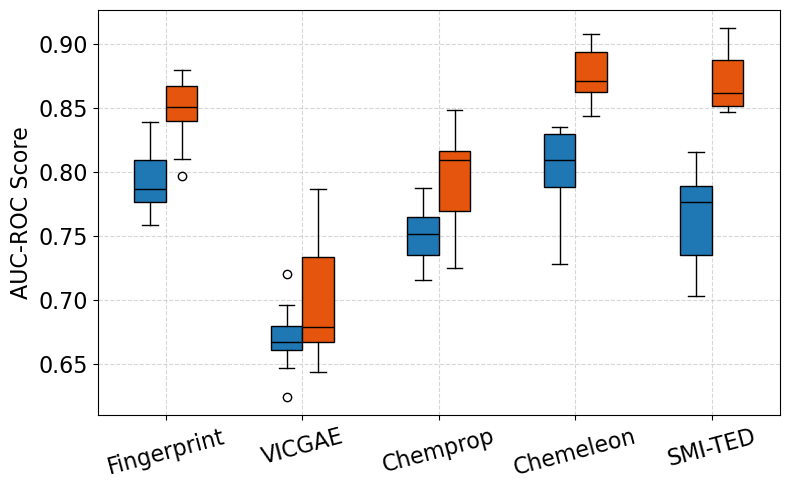

In [47]:
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
label_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']

rf_rmse = [results_dict2[m]['roc_auc'].values for m in model_type]

nn_rmse = [results_NN_binary['roc_auc_results'][m] for m in label_type]

x = np.arange(len(label_type))*1.3
width = 0.3  # space between boxes per group


plt.figure(figsize=(8, 5))
ax = plt.gca()

box1 = plt.boxplot(
    rf_rmse, positions=x - width/2, widths=width,
    patch_artist=True, labels=None
)
box2 = plt.boxplot(
    nn_rmse, positions=x + width/2, widths=width,
    patch_artist=True, labels=None
)

for patch in box1['boxes']:
    patch.set_facecolor('#1f77b4')  # blue for RF
for patch in box2['boxes']:
    patch.set_facecolor('#e6550d')  # darker orange for NN (better contrast)

# Make median lines black for visibility
for median in box1['medians'] + box2['medians']:
    median.set_color('black')
    median.set_linewidth(1)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks(ticks=x, labels=label_type, fontsize=16, rotation=15)
plt.yticks(fontsize=16)
plt.ylabel('AUC-ROC Score', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('')

plt.tight_layout()
plt.savefig("../results/binary_model_performance_update.png", dpi=600, bbox_inches="tight")
plt.show()

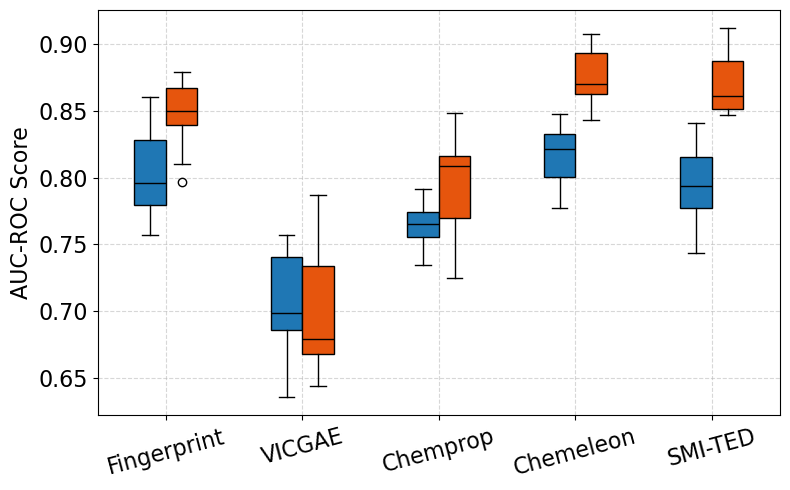

In [57]:
# log weighted concentration for binary data
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
label_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']

rf_rmse = [results_dict2_log[m]['roc_auc'].values for m in model_type]

nn_rmse = [results_NN_binary['roc_auc_results'][m] for m in label_type]

x = np.arange(len(label_type))*1.3
width = 0.3  # space between boxes per group


plt.figure(figsize=(8, 5))
ax = plt.gca()

box1 = plt.boxplot(
    rf_rmse, positions=x - width/2, widths=width,
    patch_artist=True, labels=None
)
box2 = plt.boxplot(
    nn_rmse, positions=x + width/2, widths=width,
    patch_artist=True, labels=None
)

for patch in box1['boxes']:
    patch.set_facecolor('#1f77b4')  # blue for RF
for patch in box2['boxes']:
    patch.set_facecolor('#e6550d')  # darker orange for NN (better contrast)

# Make median lines black for visibility
for median in box1['medians'] + box2['medians']:
    median.set_color('black')
    median.set_linewidth(1)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks(ticks=x, labels=label_type, fontsize=16, rotation=15)
plt.yticks(fontsize=16)
plt.ylabel('AUC-ROC Score', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('')

plt.tight_layout()
plt.savefig("../../results/binary_model_performance_log.png", dpi=600, bbox_inches="tight")
plt.show()

In [29]:
results_NN_binary.keys()

dict_keys(['roc_auc_results', 'y_pred_results', 'y_true_results', 'y_prob_results'])

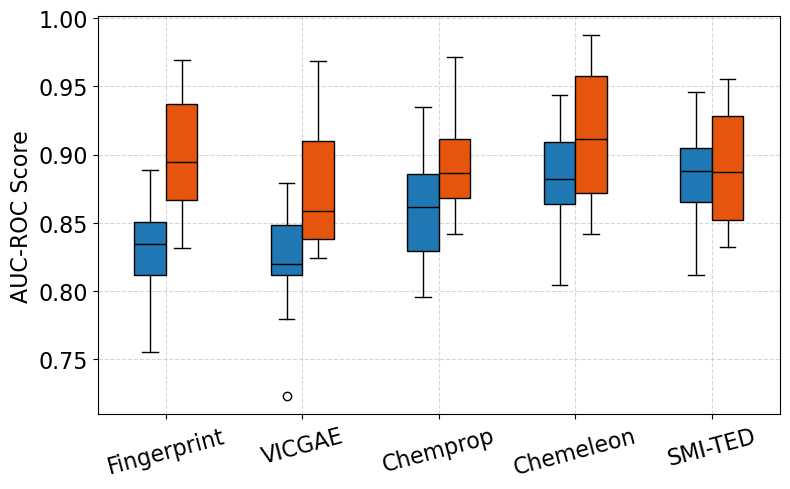

In [48]:
# Define model/dataset order and labels
model_type = ['Baseline', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']
label_type = ['Fingerprint', 'VICGAE', 'Chemprop', 'Chemeleon', 'SMI-TED']

# --- Extract data ---
# Random Forest (results_dict1)
rf_rmse = [results_dict3[m]['roc_auc'].values for m in model_type]

# Neural Network (results_NN_surf)
nn_rmse = [results_NN_am['roc_auc_results'][m] for m in label_type]

# --- Prepare positions for side-by-side boxes ---
x = np.arange(len(label_type))*1.3
width = 0.3  # space between boxes per group


plt.figure(figsize=(8, 5))
ax = plt.gca()

# Plot RF and NN boxplots side by side
box1 = plt.boxplot(
    rf_rmse, positions=x - width/2, widths=width,
    patch_artist=True, labels=None
)
box2 = plt.boxplot(
    nn_rmse, positions=x + width/2, widths=width,
    patch_artist=True, labels=None
)

for patch in box1['boxes']:
    patch.set_facecolor('#1f77b4')  # blue for RF
for patch in box2['boxes']:
    patch.set_facecolor('#e6550d')  # darker orange for NN (better contrast)

# Make median lines black for visibility
for median in box1['medians'] + box2['medians']:
    median.set_color('black')
    median.set_linewidth(1)

# Axes formatting 
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks(ticks=x, labels=label_type, fontsize=16, rotation=15)
plt.yticks(fontsize=16)
plt.ylabel('AUC-ROC Score', fontsize=16)

# Optional grid and ylim
plt.grid(True, linestyle='--', alpha=0.5)
# plt.ylim(bottom=0.3)

# Move ticks to top (if desired)
# plt.tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xlabel('')

# for pos in x:
#     plt.axvline(pos, color='gray', linestyle='--', alpha=0.2, zorder=0)
plt.tight_layout()
plt.savefig("../results/amphiphile_model_performance_update.png", dpi=600, bbox_inches="tight")
plt.show()